In [1]:
# 표준 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from random import randint
import copy

# 한글 로딩
mpl.rc('font', family='Malgun Gothic')

# batter = pd.read_csv("D:/python3/data/batter_stats_2017.csv")
batter = pd.read_csv("C:/python3/data/batter_stats_2017.csv")

batter_df = pd.DataFrame(batter)

# # BABIP ; Batted Average on Balls In Play 인플레이 (피)안타율
# # OPS ;  On base Plus Slugging 출루율+장타율
# # wOBA ; weight On-Base Average 가중출루율
# # WAR ; Win Above Replacement 대체선수 대비 승리기여도
batter_df = batter_df.rename({'BABIP':'안타율','OPS':'출루,장타율',
                              'wOBA':'가중출루율' ,'WAR':'비교기여도'}, axis=1)

for i in range(len(batter_df)):
    if batter_df['안타율'].values[i]=='-':
        batter_df['안타율'].values[i] = 0
        
batter_df['안타율'] = batter_df['안타율'].astype(float, inplace = True)

bat_mean = batter_df.mean()                             # 전체 평균
bat_ss = batter_df[batter_df['팀명']=='삼성']           # 삼성만 추출
bat_ss_mean = bat_ss.mean()                             # 삼성 평균
bat_means = pd.concat((bat_mean, bat_ss_mean), axis=1)  # 전체+삼성 평균
bat_means = bat_means.T
bat_means = round(bat_means, 2)

# 관련성 떨어지는것 or 겹치는 것 제거, OPS=출루율+장타율
bat_means.drop(['타석','타수','출루율','장타율','연봉(2018)'], axis=1, inplace=True)  
bat_means.index = ['전체평균', '삼성평균']              # 인덱스 변경
display(bat_means)

,경기,안타,홈런,득점,타점,볼넷,삼진,도루,안타율,타율,"출루,장타율",가중출루율,비교기여도,연봉(2017)
전체평균,77.71,62.26,6.36,33.28,30.82,19.34,42.15,3.67,0.30,0.25,0.67,0.29,0.79,19111.52
삼성평균,77.53,63.32,6.11,33.95,30.47,19.32,42.11,4.84,0.28,0.24,0.68,0.29,0.62,18494.74


In [2]:
batter_df.head(10)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,안타율,타율,출루율,장타율,"출루,장타율",가중출루율,비교기여도,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.390,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000
5,김선빈,KIA,137,529,476,176,5,84,64,39,...,4,0.393,0.370,0.420,0.477,0.897,0.391,5.19,28000,8000
6,버나디나,KIA,139,621,557,178,27,118,111,41,...,32,0.354,0.320,0.373,0.540,0.913,0.380,5.01,75000,75000
7,박민우,NC,106,452,388,141,3,84,47,46,...,11,0.408,0.363,0.441,0.472,0.913,0.404,4.92,32000,25000
8,김하성,넥센,141,601,526,159,23,90,114,58,...,16,0.306,0.302,0.376,0.513,0.889,0.375,4.76,32000,22000
9,스크럭스,NC,115,518,437,131,35,91,111,65,...,4,0.353,0.300,0.402,0.595,0.997,0.411,4.70,70000,80000


In [3]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/(series_std))
    return df

In [4]:
bat_df = standard_scaling(copy.deepcopy(batter_df), batter_df.columns[2:])
bat_df.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,안타율,타율,출루율,장타율,"출루,장타율",가중출루율,비교기여도,연봉(2018),연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,3.107502,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,4.045622,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,0.512037,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,0.699661,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,4.045622,1.484672


In [5]:
bat_df.drop(['타석', '타수', '출루율', '장타율', '연봉(2018)'], axis = 1, inplace = True)
bat_df.head()

,선수명,팀명,경기,안타,홈런,득점,타점,볼넷,삼진,도루,안타율,타율,"출루,장타율",가중출루율,비교기여도,연봉(2017)
0,최정,SK,1.149505,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.112293,0.647202,1.732763,1.380264,3.857382,3.264136
1,최형우,KIA,1.413314,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.467572,0.899677,1.397014,1.268659,3.798140,4.234754
2,박건우,두산,1.171489,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,0.683829,1.132730,1.318014,1.212856,3.703353,0.012569
3,나성범,NC,1.039584,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.861468,0.948230,1.290364,1.138453,2.873969,0.514054
4,손아섭,롯데,1.457283,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.560253,0.831703,1.033615,0.971045,2.850272,1.484672


In [6]:
import statsmodels.api as sm

y = batter_df['연봉(2017)']
X = batter_df[batter_df.columns.difference(['선수명','팀명','연봉(2017)'])]

# X_train = sm.add_constant(X_train)
# model = sm.OLS(y_train, X_train).fit()  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()  
model.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2017)   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     124.2
Date:                Fri, 14 May 2021   Prob (F-statistic):           2.13e-87
Time:                        00:29:01   Log-Likelihood:                -1998.8
No. Observations:                 191   AIC:                             4034.
Df Residuals:                     173   BIC:                             4092.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.3871   2234.785     -0.010      0.992   -4434.341    4387.567
가중출루율      -2.455e+05    2.7e+05     -0.908      0.365   -7.79e+05    2.88e+05
경기           -31.2419     51.815     -0.603      0.547    -133.513      71.029
도루           -27.6412    170.775     -0.162      0.872    -364.713     309.430
득점           -20.4397    109.399     -0.187      0.852    -236.368     195.489
볼넷          -170.5990    171.152     -0.997      0.320    -508.414     167.216
비교기여도      -1711.2619   1736.745     -0.985      0.326   -5139.200    1716.676
삼진           -34.2898     60.893     -0.563      0.574    -154.480      85.900
안타           -87.2892    193.480     -0.451      0.652    -469.175     294.596
안타율        -1877.5262   1.17e+04     -0.160      0.873    -2.5e+04    2.12e+04
연봉(2018)       0.9905      0.033     30.030      0.000       0.925       1.056
장타율        -1.792e+04   1.63e+04     -1.103      0.272      -5e+04    1.42e+04
출루,장타율      8.298e+04   8.19e+04      1.013      0.313   -7.87e+04    2.45e+05
출루율         1.009e+05   8.93e+04      1.130      0.260   -7.53e+04    2.77e+05
타석           114.7683    172.040      0.667      0.506    -224.799     454.335
타수           -91.7165    206.432     -0.444      0.657    -499.167     315.734
타율         -2.045e+04   3.28e+04     -0.624      0.534   -8.52e+04    4.43e+04
타점           130.0082    108.342      1.200      0.232     -83.835     343.851
홈런          -188.3876    312.846     -0.602      0.548    -805.875     429.100
==============================================================================
Omnibus:                       96.344   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6126.151
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                      30.679   Cond. No.                     1.36e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

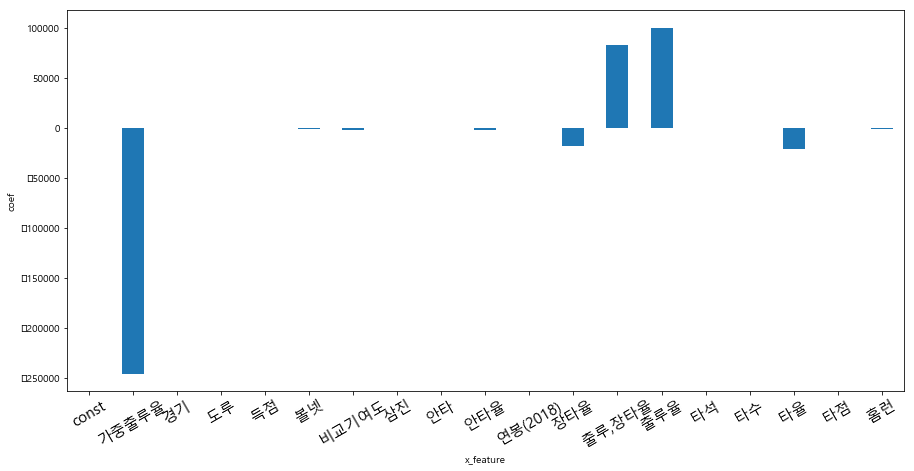

In [7]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [15,7]
coefs = model.params.tolist()      # params = parameters
coef_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coef_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=30, fontsize=15)
plt.show()

In [8]:
bat_df.drop(['가중출루율','경기','비교기여도','안타율'], axis=1, inplace=True) 
bat_df = round(bat_df, 2)
bat_df.head()

,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
0,최정,SK,1.34,4.62,1.87,2.60,2.60,1.96,-0.45,0.65,1.73,3.26
1,최형우,KIA,2.07,2.29,2.17,2.82,3.93,1.20,-0.62,0.90,1.40,4.23
2,박건우,두산,2.09,1.59,1.94,1.49,1.11,0.66,2.74,1.13,1.32,0.01
3,나성범,NC,2.02,2.06,2.34,2.16,1.47,2.23,2.24,0.95,1.29,0.51
4,손아섭,롯데,2.38,1.59,2.68,1.56,3.26,1.63,3.58,0.83,1.03,1.48


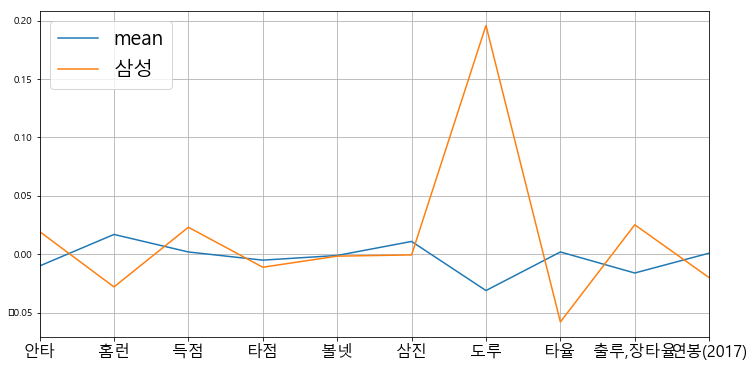

In [9]:
n = len(bat_df.columns[2:])
x_pos = np.arange(n)
plt.rcParams['figure.figsize'] = [12,  6]

bat_df.groupby('팀명').sum().mean().plot(label = 'mean')
bat_df[bat_df['팀명'] == '삼성'].mean().plot(label = '삼성')
plt.xticks(x_pos, bat_df.columns[2:].tolist(), fontsize=16)
plt.grid(True)
plt.legend(loc=2, fontsize=20)
plt.show()

In [10]:
def color():
    return '#'+hex(randint(0,255))[-2:]+hex(randint(0,255))[-2:]+hex(randint(0,255))[-2:]

In [11]:
def polarchart(list1, list2, name1, name2):
       
    plt.figure(figsize = (8, 8))
    # polarplot
    plt.subplot(polar=True)
    mn_i = bat_df.groupby('팀명').sum().mean().index.tolist()
    rgb = [randint(0,255),randint(0,255),randint(0,255)]
    
    # 세타 = 나누는 각도들[라디안] >> (2pi/개수) x 10조각(+1)
    # theta=np.arange(len(mn_i)+1)*(2*np.pi/len(mn_i))
    theta = np.linspace(0, 2*np.pi, len(mn_i)+1)
    
    c = color()
    plt.plot(theta, list1, color=c, alpha=0.5, linewidth=3)
    plt.fill(theta, list1, color=c, alpha=0.2)
    plt.plot(theta, list2, color=color(), marker='o', linewidth=5, linestyle='dashed')
    # range(0부터, 360도까지, 나누는 각도(증가폭)), 각 지점 이름(라벨)
    (lines, labels) = plt.thetagrids(range(0, 360, int(360/len(mn_i))), mn_i)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=0)
    plt.legend(labels=(name1, name2), loc=(0.38,0.73), fontsize=20)
    plt.rc("grid", linewidth=3, color='w')
    plt.gca().set_facecolor('#dcdcdc')
#     plt.gca().spines['contour'].set_visible(False)
    plt.show()

In [12]:
ssv = bat_df[bat_df['팀명'] == '삼성'].mean().values.tolist()
ssv.append(ssv[0])                              # 처음값 추가 -> 끝을 이어줌
mn = bat_df.groupby('팀명').sum().mean().values.tolist()
mn.append(mn[0])                                

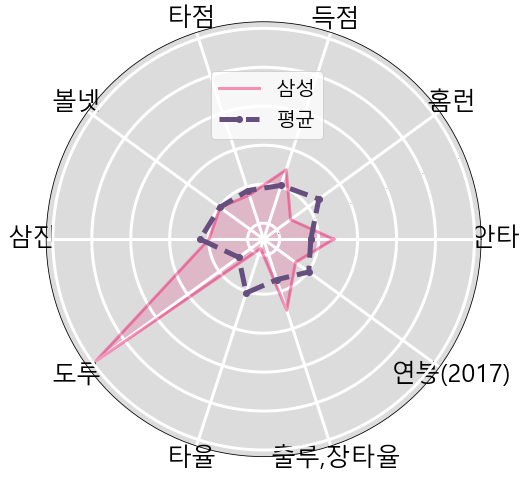

In [88]:
polarchart(ssv, mn, '삼성', '평균')

In [14]:
bat_df_mean = bat_df.groupby('팀명').sum().mean()    # 정규화 전체 평균
bat_ss_df = bat_df[bat_df['팀명']=='삼성']           # 정규화 삼성만 추출
bat_ss_df_mean = bat_ss_df.mean()                    # 정규화 삼성 평균
bat_df_means = pd.concat((bat_df_mean, bat_ss_df_mean), axis=1)  # 정규화 전체+삼성 평균
bat_df_means = bat_df_means.T
bat_df_means = round(bat_df_means, 3)

# 관련성 떨어지는것 or 겹치는 것 제거, OPS=출루율+장타율
bat_df_means.index = ['전체평균', '삼성평균']              # 인덱스 변경
display(bat_df_means)

,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
전체평균,-0.010,0.017,0.002,-0.005,-0.001,0.011,-0.031,0.002,-0.016,0.001
삼성평균,0.019,-0.028,0.023,-0.011,-0.002,-0.001,0.196,-0.058,0.025,-0.020


In [15]:
# 삼성 평균 타율 보다 낮은 선수 명단

bat_ss_df[bat_ss_df['타율'] < bat_ss_df['타율'].sum().mean()]

,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
132,김성윤,삼성,-1.12,-0.62,-1.02,-0.91,-0.89,-1.06,-0.62,-1.62,-0.50,-0.53
182,백상원,삼성,-1.03,-0.74,-0.98,-0.91,-0.84,-0.94,-0.62,-1.16,-1.43,-0.33


In [16]:
# 삼성 평균 홈런 보다 낮은 선수 명단

bat_ss_df[bat_ss_df['홈런'] < bat_ss_df['홈런'].sum().mean()]

,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
63,김성훈,삼성,-0.26,-0.74,-0.21,-0.41,-0.38,-0.79,0.06,0.67,0.27,-0.53
78,강한울,삼성,1.14,-0.74,0.83,-0.22,0.34,0.45,1.40,0.52,0.05,-0.33
105,최영진,삼성,-1.06,-0.62,-0.98,-0.85,-0.94,-1.15,-0.45,-0.48,0.46,-0.52
116,안주형,삼성,-1.08,-0.74,-1.12,-0.91,-0.99,-1.24,-0.62,0.49,0.11,-0.53
132,김성윤,삼성,-1.12,-0.62,-1.02,-0.91,-0.89,-1.06,-0.62,-1.62,-0.50,-0.53
144,이현동,삼성,-1.08,-0.74,-1.08,-0.98,-0.99,-1.06,-0.45,-0.60,-0.93,-0.53
152,김민수,삼성,-1.08,-0.74,-1.05,-0.88,-0.94,-1.03,-0.62,-1.03,-1.19,-0.52
182,백상원,삼성,-1.03,-0.74,-0.98,-0.91,-0.84,-0.94,-0.62,-1.16,-1.43,-0.33
184,이지영,삼성,0.18,-0.74,-0.08,-0.15,0.03,-0.06,0.06,-0.11,-0.37,0.22


In [17]:
# 타율이 전체 평균 보다 낮은 선수 들중에서 타율과 홈런 내림차순

a = bat_ss_df.query("타율 < 0.002 and 홈런 < 0.017").sort_values(['타율', '홈런'])
a[['선수명','타율', '홈런', '연봉(2017)']].sort_values(by = ['연봉(2017)', '타율' , '홈런' ], ascending = False)

,선수명,타율,홈런,연봉(2017)
184,이지영,-0.11,-0.74,0.22
182,백상원,-1.16,-0.74,-0.33
159,정병곤,-0.32,-0.51,-0.51
87,권정웅,-0.36,-0.04,-0.52
105,최영진,-0.48,-0.62,-0.52
152,김민수,-1.03,-0.74,-0.52
144,이현동,-0.60,-0.74,-0.53
132,김성윤,-1.62,-0.62,-0.53


## 중간 결론 : 이지영 과 김성윤 트레이드 대상.

In [18]:
# 연봉 0.22 , -0.53 
bat_df[bat_df['연봉(2017)'] <= 0.02].sort_values(by='연봉(2017)', ascending=False).head(10)
#bat_df[['선수명','타율', '홈런', '연봉(2017)']].head()

,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
20,오재일,두산,1.16,2.29,0.96,1.84,1.31,1.14,-0.45,0.55,1.05,0.02
2,박건우,두산,2.09,1.59,1.94,1.49,1.11,0.66,2.74,1.13,1.32,0.01
11,구자욱,삼성,2.06,1.71,2.51,2.41,2.24,2.90,1.06,0.59,0.94,-0.10
188,채은성,LG,0.49,-0.51,-0.18,0.13,-0.12,0.72,0.22,0.17,-0.04,-0.10
37,나주환,SK,1.09,1.47,1.20,1.08,-0.02,1.30,-0.62,0.40,0.58,-0.13
62,서동욱,KIA,0.51,0.08,0.53,0.54,0.70,1.33,-0.45,0.32,0.39,-0.13
177,박기혁,KT,-0.11,-0.51,-0.38,-0.41,-0.17,0.27,-0.28,-0.11,-0.25,-0.13
56,배영섭,삼성,0.07,-0.04,0.19,-0.15,-0.02,0.06,-0.45,0.52,0.54,-0.13
69,정훈,롯데,-0.64,-0.62,-0.58,-0.79,-0.07,-0.43,-0.11,-0.01,0.35,-0.13
34,이명기,KIA,1.67,0.31,1.54,1.02,0.44,0.45,0.73,0.80,0.62,-0.13


In [19]:
b = bat_df[bat_df['연봉(2017)'] == -0.53]
c = b.query('타율 > 0.002 or 홈런 > 0.017')#.sort_values(['타율', '홈런'])
#c[['선수명','타율', '홈런']].sort_values(by = ['타율' , '홈런' ], ascending = False)
b[['선수명','팀명','타율', '홈런']].sort_values(by = ['홈런' , '타율' ], ascending = False)

,선수명,팀명,타율,홈런
31,정현,KT,0.49,-0.04
18,이정후,넥센,0.72,-0.51
79,강진성,NC,0.45,-0.62
68,황진수,롯데,0.40,-0.62
160,도태훈,NC,-0.57,-0.62
132,김성윤,삼성,-1.62,-0.62
167,김태연,한화,-1.96,-0.62
95,김주성,LG,7.29,-0.74
91,노관현,KIA,2.43,-0.74
104,박유연,두산,0.81,-0.74


## 최종 트레이드 : 이지영(삼성) - 오재일(두산), 김성윤(삼성) - 정현(KT)

In [20]:
bat_bad_df = pd.concat((bat_df[bat_df['선수명']=='이지영'].T, 
                        bat_df[bat_df['선수명']=='김성윤'].T), axis=1).T

bat_nice_df = pd.concat((bat_df[bat_df['선수명']=='오재일'].T, 
                         bat_df[bat_df['선수명']=='정현'].T), axis=1).T

print("'삼성' 방출 대상")
display(bat_bad_df)
print("\n신규 영입 대상")
display(bat_nice_df)

'삼성' 방출 대상


,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
184,이지영,삼성,0.18,-0.74,-0.08,-0.15,0.03,-0.06,0.06,-0.11,-0.37,0.22
132,김성윤,삼성,-1.12,-0.62,-1.02,-0.91,-0.89,-1.06,-0.62,-1.62,-0.5,-0.53



신규 영입 대상


,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
20,오재일,두산,1.16,2.29,0.96,1.84,1.31,1.14,-0.45,0.55,1.05,0.02
31,정현,KT,0.78,-0.04,0.39,0.35,-0.07,0.81,0.06,0.49,0.48,-0.53


In [21]:
jy_df = bat_bad_df[bat_bad_df['선수명'] == '이지영'].values.tolist()
sy_df = bat_bad_df[bat_bad_df['선수명'] == '김성윤'].values.tolist()
ji_df = bat_nice_df[bat_nice_df['선수명'] == '오재일'].values.tolist()
jh_df = bat_nice_df[bat_nice_df['선수명'] == '정현'].values.tolist()

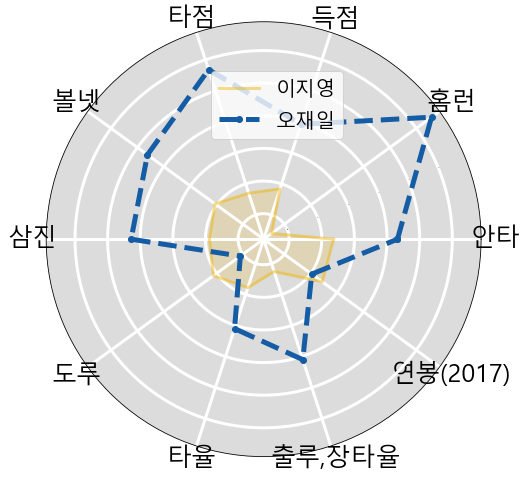

In [72]:
# 이지영 >> 오재일 그래프
polarchart(jy_df[0][2:]+[jy_df[0][2]], ji_df[0][2:]+[ji_df[0][2]], '이지영', '오재일')

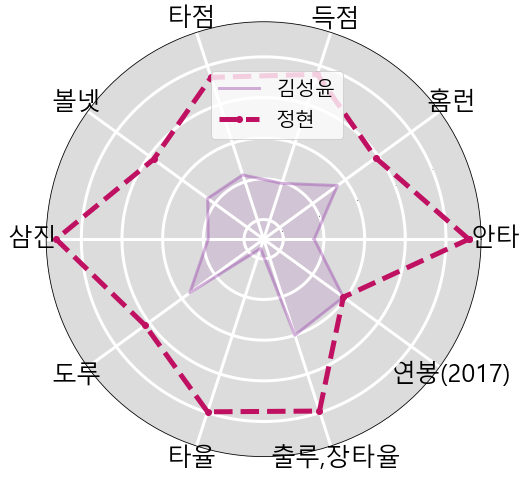

In [65]:
# 김성윤 >> 정현 그래프
polarchart(sy_df[0][2:]+[sy_df[0][2]], jh_df[0][2:]+[jh_df[0][2]], '김성윤', '정현')

In [29]:
import copy
new_ss_df = copy.deepcopy(bat_ss_df)
# new_ss_df = new_ss_df.drop([int(new_ss_df[new_ss_df['선수명'] == '이지영'].index.values),
#                             int(new_ss_df[new_ss_df['선수명'] == '김성윤'].index.values)])
new_ss_df = new_ss_df[new_ss_df['선수명'] != '이지영']
new_ss_df = new_ss_df[new_ss_df['선수명'] != '김성윤']
new_ss_df = pd.concat([new_ss_df, bat_nice_df])  # 신규 추가
new_ss_df

,선수명,팀명,안타,홈런,득점,타점,볼넷,삼진,도루,타율,"출루,장타율",연봉(2017)
10,러프,삼성,1.82,2.87,1.91,2.95,2.08,1.96,-0.28,0.64,1.16,2.94
11,구자욱,삼성,2.06,1.71,2.51,2.41,2.24,2.9,1.06,0.59,0.94,-0.1
46,조동찬,삼성,0.72,0.42,0.06,0.48,0.14,0.9,-0.11,0.39,0.44,0.68
50,이원석,삼성,0.85,1.36,0.73,0.99,0.75,1.14,-0.28,0.15,0.4,0.35
55,박해민,삼성,1.82,0.08,2.11,0.73,1.57,1.08,6.1,0.34,0.23,0.13
56,배영섭,삼성,0.07,-0.04,0.19,-0.15,-0.02,0.06,-0.45,0.52,0.54,-0.13
63,김성훈,삼성,-0.26,-0.74,-0.21,-0.41,-0.38,-0.79,0.06,0.67,0.27,-0.53
78,강한울,삼성,1.14,-0.74,0.83,-0.22,0.34,0.45,1.4,0.52,0.05,-0.33
87,권정웅,삼성,-0.75,-0.04,-0.75,-0.63,-0.58,-0.34,-0.62,-0.36,0.12,-0.52
90,박한이,삼성,-0.57,-0.27,-0.65,-0.53,-0.32,-0.28,-0.62,0.13,0.4,0.84


In [30]:
new_ss_df[new_ss_df.columns.difference(['선수명', '팀명'])] = new_ss_df[
    new_ss_df.columns.difference(['선수명', '팀명'])].astype(float)
new_ss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 10 to 31
Data columns (total 12 columns):
선수명         19 non-null object
팀명          19 non-null object
안타          19 non-null float64
홈런          19 non-null float64
득점          19 non-null float64
타점          19 non-null float64
볼넷          19 non-null float64
삼진          19 non-null float64
도루          19 non-null float64
타율          19 non-null float64
출루,장타율      19 non-null float64
연봉(2017)    19 non-null float64
dtypes: float64(10), object(2)
memory usage: 1.9+ KB


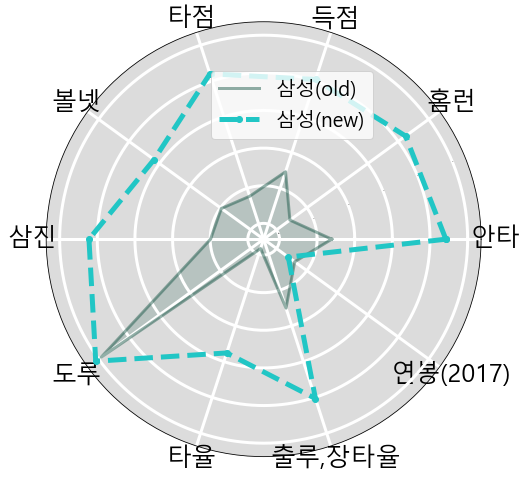

In [62]:
n_ssv = new_ss_df.mean().values.tolist()
n_ssv.append(n_ssv[0])

# 과거삼성과 미래삼성 비교그래프
polarchart(ssv, n_ssv, '삼성(old)', '삼성(new)')

## 2018년도 타자 연봉 예측

In [32]:
for i in range(len(batter_df)):
    if batter['BABIP'].values[i]=='-':
        batter['BABIP'].values[i] = 0
        
batter['BABIP'] = batter['BABIP'].astype(float, inplace = True)

In [33]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 21 columns):
선수명         191 non-null object
팀명          191 non-null object
경기          191 non-null int64
타석          191 non-null int64
타수          191 non-null int64
안타          191 non-null int64
홈런          191 non-null int64
득점          191 non-null int64
타점          191 non-null int64
볼넷          191 non-null int64
삼진          191 non-null int64
도루          191 non-null int64
안타율         191 non-null float64
타율          191 non-null float64
출루율         191 non-null float64
장타율         191 non-null float64
출루,장타율      191 non-null float64
가중출루율       191 non-null float64
비교기여도       191 non-null float64
연봉(2018)    191 non-null int64
연봉(2017)    191 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 31.4+ KB


In [34]:
scale_columns =['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2017)']

In [35]:
batman_df = standard_scaling(copy.deepcopy(batter), scale_columns)

In [36]:
batman_df = batman_df.rename(columns = {'연봉(2018)': 'y'})
batman_df.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,...,-0.448042,0.112293,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,...,-0.615839,0.467572,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,...,2.740086,0.683829,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,...,2.236697,0.861468,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,...,3.579067,0.560253,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,150000,1.484672


In [37]:
# 범주형 데이터 '팀명'을 정규화 : 원핫인코딩 - get_dummies()
team_scaling = pd.get_dummies(batman_df['팀명'])
batman_df = batman_df.drop('팀명', axis = 1)
batman_df = batman_df.join(team_scaling)
team_scaling.head()

,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#데이터는 대문자 X, 레이블은 소문자 y
y = batman_df['y']
# 선수명과 'y'를 뺀 나머지는 데이터다.
X = batman_df[batman_df.columns.difference(['선수명', 'y'])] # difference() ~뺀 나머지

# train : test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 19)

In [39]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)  # 상수항 추가하는 작업-> 상수를 적어서 선을 움직여야 한다.
model = sm.OLS(y_train, X_train).fit()
# model = sm.OLS.from_formula('y_train ~ X_train', data = picher_df)
model.summary()

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     64.25
Date:                Fri, 14 May 2021   Prob (F-statistic):           4.80e-60
Time:                        00:29:49   Log-Likelihood:                -1567.4
No. Observations:                 152   AIC:                             3189.
Df Residuals:                     125   BIC:                             3270.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.917e+04    602.240     31.830      0.000     1.8e+04    2.04e+04
BABIP       -236.2490   1503.349     -0.157      0.875   -3211.562    2739.065
KIA         1819.2924   2320.077      0.784      0.434   -2772.428    6411.013
KT          -586.6258   2197.943     -0.267      0.790   -4936.628    3763.377
LG          3170.1278   2063.356      1.536      0.127    -913.510    7253.766
NC         -1585.0389   2035.486     -0.779      0.438   -5613.518    2443.440
OPS        -1.184e+04   9690.952     -1.222      0.224    -3.1e+04    7339.993
SK           712.3950   2066.385      0.345      0.731   -3377.238    4802.028
WAR         2564.4030   3269.079      0.784      0.434   -3905.511    9034.317
wOBA        3.265e+04   2.89e+04      1.131      0.260   -2.45e+04    8.98e+04
경기           717.0441   2667.842      0.269      0.789   -4562.946    5997.035
넥센          -443.4422   1948.813     -0.228      0.820   -4300.385    3413.500
도루           957.3985   1020.277      0.938      0.350   -1061.856    2976.653
두산          2941.1687   2323.069      1.266      0.208   -1656.473    7538.811
득점         -2847.8915   3430.496     -0.830      0.408   -9637.270    3941.487
롯데          9371.0959   2199.008      4.262      0.000    5018.987    1.37e+04
볼넷          1.145e+04   3583.856      3.194      0.002    4353.427    1.85e+04
삼성          1559.9209   2002.284      0.779      0.437   -2402.848    5522.690
삼진          -508.9160   2282.110     -0.223      0.824   -5025.495    4007.663
안타          7154.1549   1.13e+04      0.632      0.528   -1.52e+04    2.95e+04
연봉(2017)    2.703e+04   1245.371     21.707      0.000    2.46e+04    2.95e+04
장타율        -5552.9444   5745.149     -0.967      0.336   -1.69e+04    5817.418
출루율        -1.925e+04   1.48e+04     -1.297      0.197   -4.86e+04    1.01e+04
타석         -7.002e+04   3.76e+04     -1.863      0.065   -1.44e+05    4377.499
타수          5.825e+04   3.94e+04      1.479      0.142   -1.97e+04    1.36e+05
타율          2589.9019   3295.695      0.786      0.433   -3932.688    9112.492
타점         -2754.6222   3846.260     -0.716      0.475   -1.04e+04    4857.604
한화          2210.6834   1981.938      1.115      0.267   -1711.818    6133.185
홈런          3918.7411   3053.614      1.283      0.202   -2124.739    9962.222
==============================================================================
Omnibus:                      115.076   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.469
Skew:                           2.223   Prob(JB):                         0.00
Kurtosis:                      24.344   Cond. No.                     6.35e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

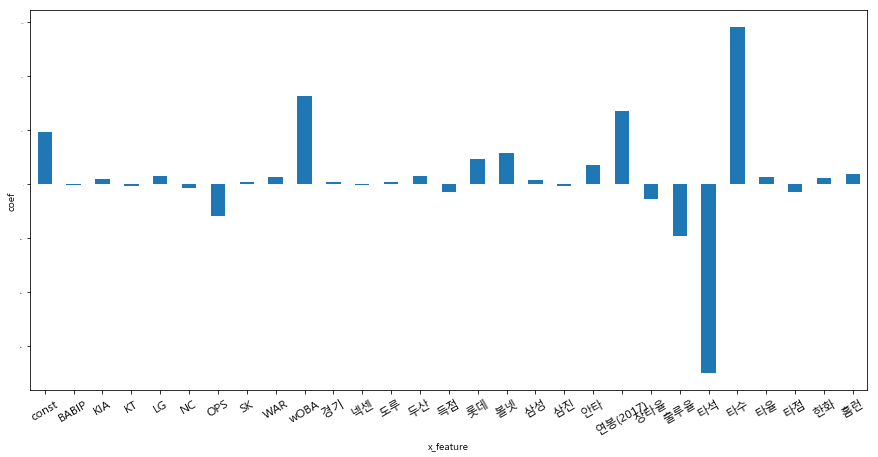

In [40]:
# 회귀계수를 이용해서 시각화
plt.rcParams['figure.figsize'] = [15,  7]
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind = 'bar')
ax.set_ylabel('coef')
ax.set_xlabel('x_feature')
ax.set_xticklabels(x_labels, rotation=30, fontsize=12)
plt.show()

In [41]:
#데이터는 대문자 X, 레이블은 소문자 y
y = batman_df['y']
# 선수명과 'y'를 뺀 나머지는 데이터다.
X = batman_df[batman_df.columns.difference(['선수명', 'y'])] # difference() ~뺀 나머지

# train : test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 VIF 계수 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif.round(1)

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,feature
0,6.0,BABIP
1,1.1,KIA
2,1.1,KT
3,1.2,LG
4,1.1,NC
5,inf,OPS
6,1.2,SK
7,21.5,WAR
8,2190.9,wOBA
9,14.4,경기


In [43]:
# 회귀모델 생성하고 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [44]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.930376695167735
0.9605253564830735


In [45]:
X = batman_df[batman_df.columns.difference(['선수명', 'y'])]
predict_2018_salary = lr.predict(X)
batman_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)
batman_df.head()

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화,예측연봉(2018)
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,...,0,0,0,1,0,0,0,0,0,127396.549024
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,...,0,0,0,0,0,0,0,0,0,157881.879741
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,...,0,0,0,0,0,1,0,0,0,41442.144148
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,...,0,0,1,0,0,0,0,0,0,46877.614190
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,...,0,0,0,0,0,0,1,0,0,95565.652668


In [46]:
def sum_salary(x):
    a = []
    for i in x:
        b= batman_df[batman_df['선수명']==i]['예측연봉(2018)'].values
        a.append(float(b))
    c = sum(a)
    return c

In [47]:
ss_old = bat_df[bat_df['팀명'] == '삼성']['선수명'].values
ss_old

array(['러프', '구자욱', '조동찬', '이원석', '박해민', '배영섭', '김성훈', '강한울', '권정웅',
       '박한이', '김헌곤', '최영진', '안주형', '김성윤', '이현동', '김민수', '정병곤', '백상원',
       '이지영'], dtype=object)

In [48]:
ss_new = new_ss_df['선수명'].values
ss_new

array(['러프', '구자욱', '조동찬', '이원석', '박해민', '배영섭', '김성훈', '강한울', '권정웅',
       '박한이', '김헌곤', '최영진', '안주형', '이현동', '김민수', '정병곤', '백상원', '오재일',
       '정현'], dtype=object)

In [49]:
sum_salary(ss_old)

383969.3019036336

In [50]:
sum_salary(ss_new)

397384.5679673465

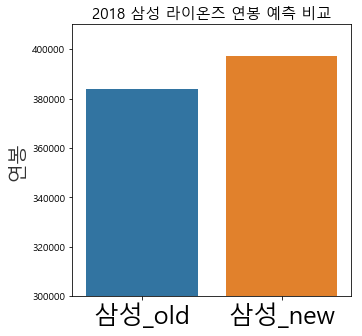

In [51]:
samsung_df = pd.DataFrame([sum_salary(ss_old), sum_salary(ss_new)], index=['삼성_old', '삼성_new'], columns=['salary'])

plt.figure(figsize=(5,5))
sns.barplot(data=samsung_df, x=['삼성_old', '삼성_new'], y='salary')
plt.title('2018 삼성 라이온즈 연봉 예측 비교',fontsize=15) 
plt.yticks(fontsize=10)
plt.ylabel('연봉', fontsize =20, alpha = 0.8)
plt.ylim(300000, 410000)
plt.show()

## 결론 : 2018년도 예측 연봉이 13,415.27 ( 만원 ) 차이로 팀의 능력치가 크게 향상이 되었음 트레이드를 잘했다고 생각. 

In [52]:
# 피처 엔지니어링

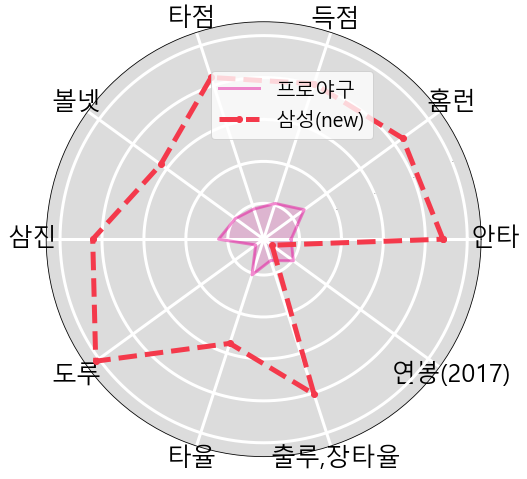

In [53]:
polarchart(mn, n_ssv, '프로야구', '삼성(new)')

In [54]:
change_df1 = batter_df[batter_df['선수명']=='이지영'].append(batter_df[batter_df['선수명']=='오재일'])
change_df1 = change_df1.set_index('선수명')
change_df1 = change_df1[['안타', '홈런','타율','득점','타점']]
change_df1['타율'] = change_df1['타율'].apply(lambda x: x*100)
change_df1

,안타,홈런,타율,득점,타점
선수명,,,,,
이지영,72,0,23.8,31,26
오재일,126,26,30.6,62,89


<Figure size 720x720 with 0 Axes>

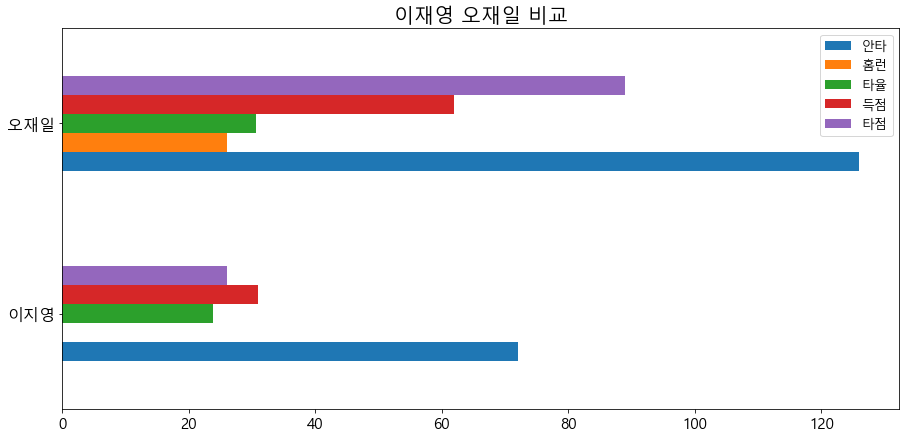

In [55]:
plt.figure(figsize=(10,10))
change_df1.plot(kind='barh')
plt.title('이재영 오재일 비교',fontsize=20) 
plt.xticks(range(0,130,20), fontsize=15)
plt.yticks(fontsize=16)
plt.ylabel("")
plt.legend(fontsize=13)
plt.show()

In [56]:
change_df2 = batter_df[batter_df['선수명']=='김성윤'].append(batter_df[batter_df['선수명']=='정현'])
change_df2 = change_df2.set_index('선수명')
change_df2 = change_df2[['안타', '홈런','타율','득점','타점']]
change_df2['타율'] = change_df2['타율'].apply(lambda x: x*100)
change_df2

,안타,홈런,타율,득점,타점
선수명,,,,,
김성윤,1,1,8.3,3,2
정현,105,6,30.0,45,42


<Figure size 144x144 with 0 Axes>

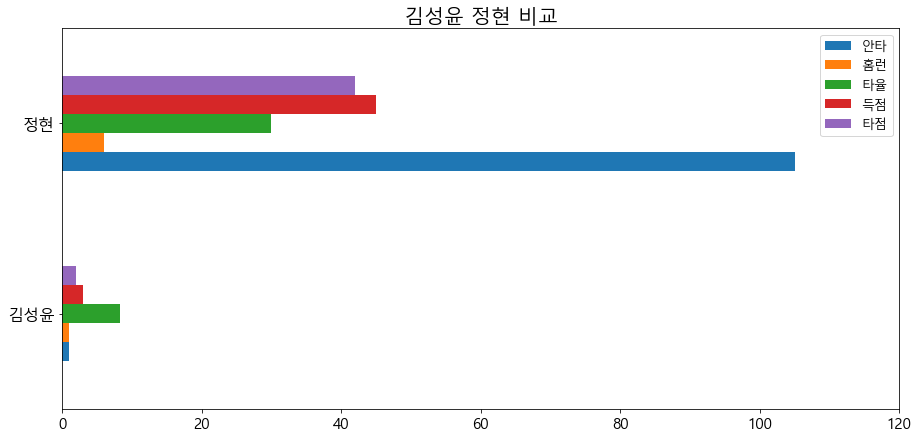

In [61]:
plt.figure(figsize=(10,10))
change_df2.plot(kind='barh')
plt.title('김성윤 정현 비교',fontsize=20) 
plt.xticks(range(0,130,20), fontsize=15)
plt.yticks(fontsize=16)
plt.ylabel("")
plt.legend(fontsize=13)
plt.show()